### 01. import
  - tensorflow : tf 명칭으로 사용
  - keras
    
  - numpy : np 명칭으로 사용
  - matplotlib : plt 명칭으로 사용 -> 시각화

In [49]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [50]:
# tensorflow version
print(tf.__version__)


2.5.0


### 02. Dataset

#### fashion MNIST
  - 10개 범주(category) : 이미지 70,000개
  - 해상도 : 28 x 28 pixel  
    
#### mnist dataset
  - train dataset : 60,000
  - test dataset : 10,000

In [51]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### class
label|class
--|--
0|T-shirt/top
1|Trouser
2|Pullover
3|Dress
4|Coat
5|Sandal
6|Shirt
7|Sneaker
8|Bag
9|Ankle boot

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### data 살펴보기

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
len(train_labels)

60000

In [55]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [56]:
test_images.shape

(10000, 28, 28)

In [57]:
len(test_labels)

10000

In [58]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### 데이터 전처리

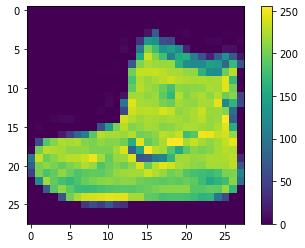

In [59]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [61]:
# 값의 범위를 0~1사이로 조정
train_images = train_images / 255.0
#test_images = train_images / 255.0
test_images = test_images / 255.0

In [62]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

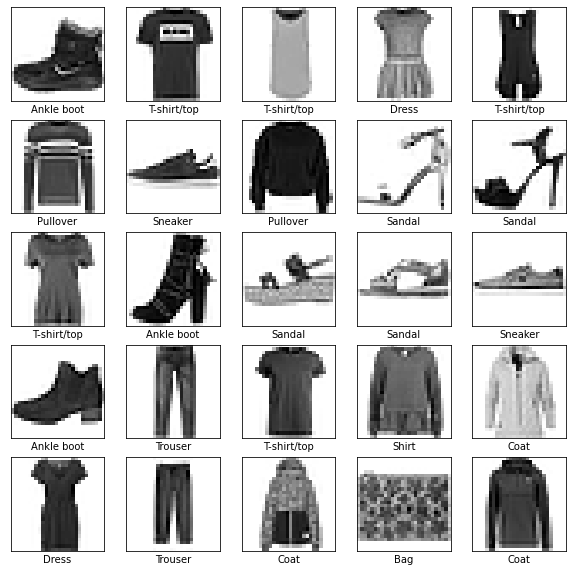

In [63]:
# image 25개 출력
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### 03. 모델 구성
  - 층(layer) 설정 : 간단한 층을 연결하여 구성
    - tf.keras.layers.Dense  
  - Flatten : 28 x 28 2차원 배열 -> 784의 1차원 배열로 변환
    - 학습되는 가중치는 없고 데이터를 변환만 함  
  - Dense : densely-connected / fully-connected layer
    - 첫번째 : 128개 노드(뉴런)
      - 활성화 함수 : relu
    - 두번째 : 10개 노드
      - 활성화 함수 : softmax
      - 10개 노드 : 분류항목

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 04. 모델 컴파일
  - 손실함수(Loss Function) : 훈련하는 동안 label과의 오차를 측정
    - 학습 : 손실값을 최소화
  - 옵티마이저(Optimizer) : 손실함수를 바탕으로 모델의 업데이트 방법을 결정
  - 지표(Metrics) : 훈련과 테스트 단계를 모니터링하기 위해 사용

In [65]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 05. 모델 훈련
  - 훈련데이터를 모델에 대입
  - 모델의 이미지와 레이블을 매핑
  - 테스트 세트에 대한 모델의 예측 / 레이블과 비교

In [66]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 5ms/step - loss: 0.4962 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3761 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3375 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3134 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2932 - accuracy: 0.8921


### 06. 정확도 평가

### <오류발생 : 찾아서 수정 후 진행>

```Python
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\ntest accuracy: ', test_acc)


ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.
```
  
  
#### 오류발생 : 데이터에서 x, y의 개수의 차이가 있음.
#### 코드를 다시 살펴보면서 개수가 변경되는 부분을 찾을 수 있었음 -> 수정
  
    
    


```Python
#값의 범위를 0~1사이로 조정
train_images = train_images / 255.0
test_images = train_images / 255.0  # 여기에 오류 있습니다.
```


In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\ntest accuracy: ', test_acc)

313/313 - 9s - loss: 0.3482 - accuracy: 0.8744

test accuracy:  0.8744000196456909


### 07. 예측 만들기

In [68]:
predictions = model.predict(test_images)

In [69]:
predictions[0]

array([2.4537260e-06, 5.3777743e-08, 9.4284992e-08, 2.8809595e-08,
       6.8595035e-08, 5.5387085e-03, 4.8385988e-07, 1.4015856e-01,
       2.4620858e-05, 8.5427493e-01], dtype=float32)

In [70]:
np.argmax(predictions[0])

9

In [71]:
test_labels[0]

9

In [74]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [80]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

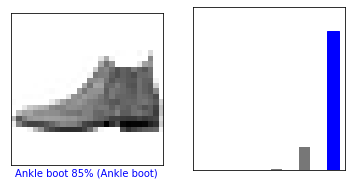

In [81]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

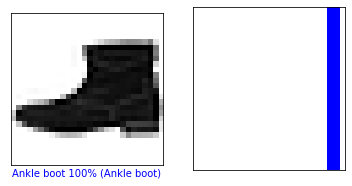

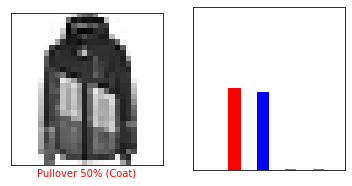

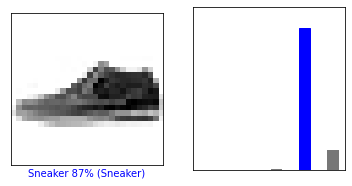

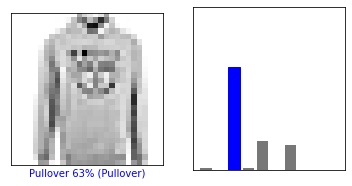

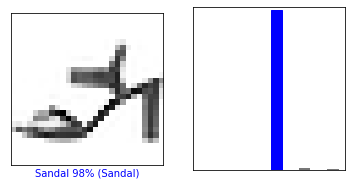

In [84]:
import random

for a in range(5):
    i = random.randint(0, 10000)
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()

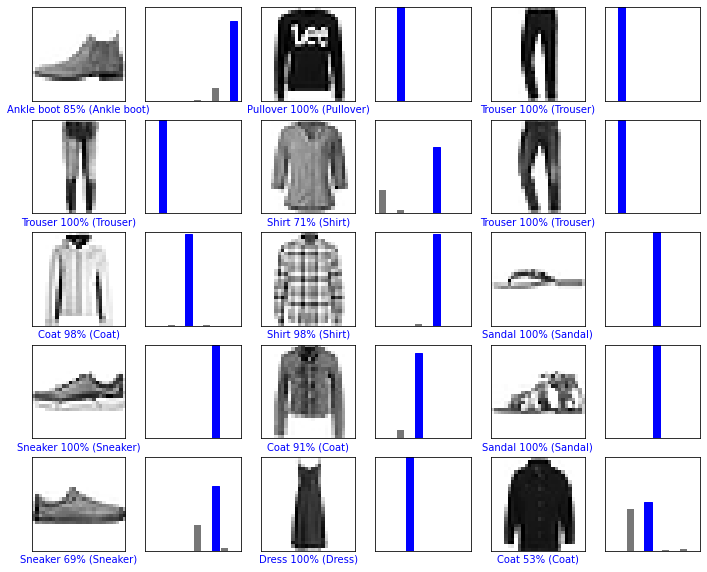

In [85]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [90]:
img = test_images[0]
print(img.shape)

(28, 28)


In [91]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [92]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.4537217e-06 5.3777651e-08 9.4284651e-08 2.8809600e-08 6.8595050e-08
  5.5387015e-03 4.8385954e-07 1.4015843e-01 2.4620816e-05 8.5427511e-01]]


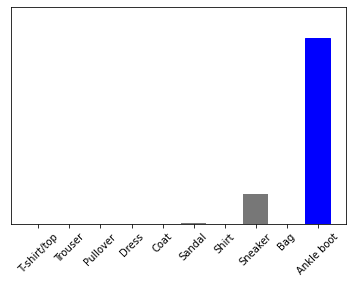

In [94]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)